<a href="https://colab.research.google.com/github/shivansh11235/Breast-Cancer-Detection-System/blob/main/Breast_Cancer_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Problem Statement: Breast cancer is one of the most common and deadly cancers among women worldwide. Early detection significantly increases the chances of successful treatment and survival. Medical imaging techniques such as mammography, ultrasound, and histopathology are commonly used to screen for breast cancer, but manual interpretation by radiologists can be time-consuming and prone to human error.

This project aims to build a machine learning system that can automatically detect and classify breast cancer from medical images. The system will analyze input images and predict whether a tumor is benign (non-cancerous) or malignant (cancerous), helping assist radiologists in faster and more accurate diagnosis.

🎯 Type of Prediction / Classification This is a binary classification problem. The model will classify each input image into one of two categories:

Benign (non-cancerous)

Malignant (cancerous)

In some datasets, there may be additional subtypes (multi-class classification), but the core objective here is to detect malignancy — hence binary classification is the main focus.

🏁 Project Goals and Success Criteria 📌 Goals Build an image classification model using Convolutional Neural Networks (CNNs) capable of accurately distinguishing between benign and malignant tumors.

Use real-world breast cancer imaging datasets to train, evaluate, and validate the model.

Improve model performance using data preprocessing, augmentation, and transfer learning.

Ensure the model is interpretable and could assist medical professionals.

Success Criteria & Quantitative Metrics:

Accuracy ≥ 90%

F1-score ≥ 0.85

Precision and Recall should be balanced (especially minimizing false negatives — malignant cases classified as benign)

ROC-AUC score to assess performance across thresholds

Qualitative Metrics:

-Clear and interpretable visualizations of model predictions (e.g., Grad-CAM, confusion matrix)

-Well-documented and reproducible workflow

-Ethical discussion and limitations clearly addressed

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivanshsangal","key":"b23aec8b8a3044dfefbe4f7f2eaea7e1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -l kaggle.json

-rw-r--r-- 1 root root 70 Jun 26 13:37 kaggle.json


In [ ]:
!kaggle datasets list -s histopathology

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
paultimothymooney/breast-histopathology-images                  Breast Histopathology Images                        3326820824  2017-12-19 05:46:40.600000          79769       1067  0.75             
forderation/breakhis-400x                                       BreaKHis 400X                                        842020096  2020-07-29 03:58:30.600000           5747         55  0.8125           
farjanakabirsamanta/skin-cancer-dataset                         Skin Cancer Dataset                                 2771667210  2022-11-01 09:04:58.650000           9406        124  0.8235294        


In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images
!unzip -q breast-histopathology-images.zip -d breast-cancer-data

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.08G/3.10G [00:21<00:00, 165MB/s]
100% 3.10G/3.10G [00:21<00:00, 154MB/s]


In [ ]:
import os
os.listdir('breast-cancer-data')

['8955',
 '10262',
 '10260',
 '14081',
 '9177',
 '13617',
 '8867',
 '10278',
 '12908',
 '12882',
 '14211',
 '12900',
 '13403',
 '16085',
 '12898',
 '12890',
 '15513',
 '12877',
 '9344',
 '9044',
 '10291',
 '9259',
 '9255',
 '8913',
 '13666',
 '12878',
 '9226',
 '12241',
 '12935',
 '10255',
 '9382',
 '10279',
 '12876',
 '12879',
 '9347',
 '9037',
 '14154',
 '16570',
 '12906',
 '13458',
 '12823',
 '15472',
 '8959',
 '9322',
 '9075',
 '12748',
 '13018',
 '16568',
 '12881',
 '12951',
 '9250',
 '16531',
 '10290',
 '8950',
 '16553',
 '9176',
 '13462',
 '12867',
 '12811',
 '12894',
 '15514',
 '15512',
 '12820',
 '12750',
 '8984',
 '16896',
 '15839',
 '12873',
 '10301',
 '13459',
 '14157',
 '15471',
 '8863',
 '13106',
 '16555',
 '8918',
 '13689',
 '12896',
 '13461',
 '9323',
 '9324',
 '8975',
 '12909',
 '14209',
 '9035',
 '13404',
 '14304',
 '13688',
 '12751',
 '9022',
 '10308',
 '8951',
 '14082',
 '13691',
 '13616',
 '8865',
 '13020',
 '9023',
 '14321',
 '14212',
 '10268',
 '12819',
 '10273',

In [ ]:
data_dir = 'breast-cancer-data/IDC_regular_ps50_idx5'


In [ ]:
for root, dirs, files in os.walk(data_dir):
    print(f"Directory: {root}, Subdirectories: {len(dirs)}, Files: {len(files)}")
    break

Directory: breast-cancer-data/IDC_regular_ps50_idx5, Subdirectories: 279, Files: 0


In [ ]:
print(data_dir)

breast-cancer-data/IDC_regular_ps50_idx5


In [ ]:
import os
subfolders = os.listdir(data_dir)
print("Example subfolders:", subfolders[:5])

Example subfolders: ['8955', '10262', '10260', '14081', '9177']


In [ ]:
sample_folder = os.path.join(data_dir, subfolders[0])
print("Files in one folder:", os.listdir(sample_folder)[:5])

Files in one folder: ['1', '0']


In [ ]:
import os
import pandas as pd

data_dir = 'breast-cancer-data/IDC_regular_ps50_idx5'
image_paths = []
labels = []

# Traverse folders and collect image paths and labels
for patient_folder in os.listdir(data_dir):
    patient_path = os.path.join(data_dir, patient_folder)
    if not os.path.isdir(patient_path):
        continue
    for label_folder in os.listdir(patient_path):
        label_path = os.path.join(patient_path, label_folder)
        if not os.path.isdir(label_path):
            continue
        try:
            label = int(label_folder)  # should be 0 or 1
        except ValueError:
            continue
        for filename in os.listdir(label_path):
            if filename.lower().endswith('.png'):
                full_path = os.path.join(label_path, filename)
                image_paths.append(full_path)
                labels.append(label)

# Create DataFrame
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# ✅ Convert labels to string class names
df['label'] = df['label'].map({0: 'benign', 1: 'malignant'})

print("✅ Total images found:", len(df))
print(df['label'].value_counts())


✅ Total images found: 277524
label
benign       198738
malignant     78786
Name: count, dtype: int64


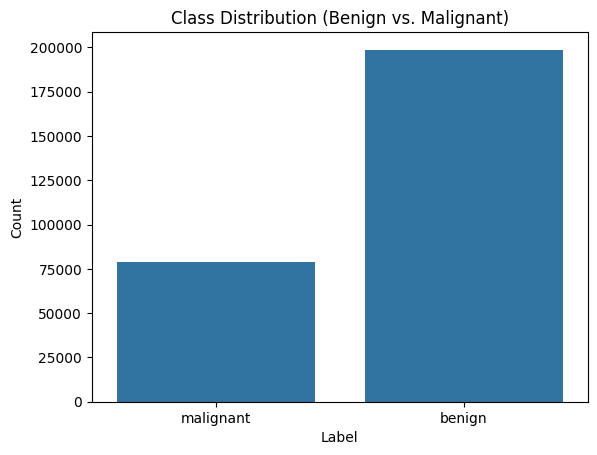

Benign: 198738 (71.61%)
Malignant: 78786 (28.39%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution plot
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Benign vs. Malignant)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Percentages
benign = df['label'].value_counts()['benign']
malignant = df['label'].value_counts()['malignant']
total = benign + malignant

print(f"Benign: {benign} ({benign/total*100:.2f}%)")
print(f"Malignant: {malignant} ({malignant/total*100:.2f}%)")

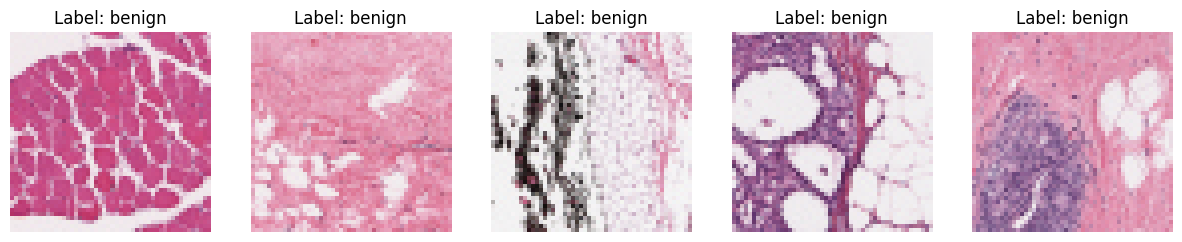

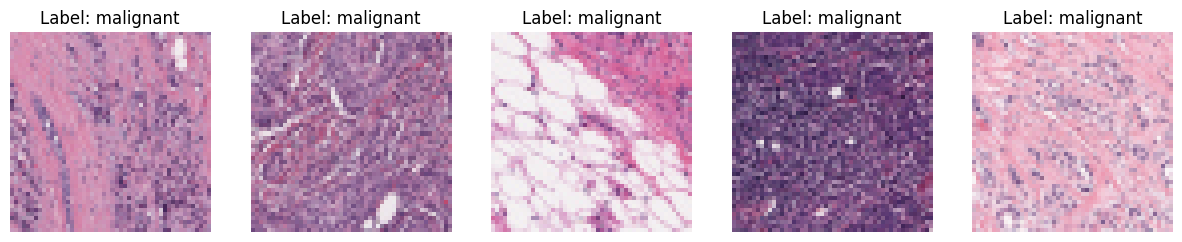

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to show sample images for a label
def show_samples(label, n=5):
    sample_paths = df[df['label'] == label].sample(n)['image_path'].values
    plt.figure(figsize=(15, 5))
    for i, path in enumerate(sample_paths):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

# Call with updated labels
show_samples('benign')
show_samples('malignant')

In [ ]:
print(df['label'].unique())
print(df['label'].value_counts())

['malignant' 'benign']
label
benign       198738
malignant     78786
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# First, split off test set (20%)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Then split the remaining train into train and validation (20% of train)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")


Train: 177615, Validation: 44404, Test: 55505


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 64  # or 224 if using pretrained models like ResNet
BATCH_SIZE = 32

# Augmentation for training, only rescaling for val/test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Validation generator
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Test generator
test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 177615 validated image filenames belonging to 2 classes.
Found 44404 validated image filenames belonging to 2 classes.
Found 55505 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
IMG_SIZE = 64

model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # <--- THIS MUST MATCH YOUR IMAGE SIZE & CHANNELS
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    # Add more layers...
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,937,666 (15.02 MB)

 Trainable params: 3,937,602 (15.02 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',        # Use 'grayscale' if your images are black & white
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

print(model.output_shape)  # Should be (None, 2)

Found 177615 validated image filenames belonging to 2 classes.
Found 44404 validated image filenames belonging to 2 classes.
(None, 2)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,              # You can adjust epochs as needed
    validation_data=val_generator,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5551/5551 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8143 - loss: 0.4913

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5551/5551 ━━━━━━━━━━━━━━━━━━━━ 233s 41ms/step - accuracy: 0.8143 - loss: 0.4913 - val_accuracy: 0.6531 - val_loss: 0.6196
Epoch 2/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 103s 19ms/step - accuracy: 0.8317 - loss: 0.4023 - val_accuracy: 0.8195 - val_loss: 0.5355
Epoch 3/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 142s 19ms/step - accuracy: 0.8395 - loss: 0.3828 - val_accuracy: 0.8333 - val_loss: 0.4458
Epoch 4/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 143s 19ms/step - accuracy: 0.8445 - loss: 0.3719 - val_accuracy: 0.8106 - val_loss: 0.4154
Epoch 5/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 144s 19ms/step - accuracy: 0.8484 - loss: 0.3585 - val_accuracy: 0.5831 - val_loss: 0.8263
Epoch 6/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - accuracy: 0.8491 - loss: 0.3587 - val_accuracy: 0.7412 - val_loss: 1.0517
Epoch 7/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 141s 19ms/step - accuracy: 0.8522 - loss: 0.3506 - val_accuracy: 0.8584 - val_loss: 0.3312
Epoch 8/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - accuracy: 0.8533 - lo

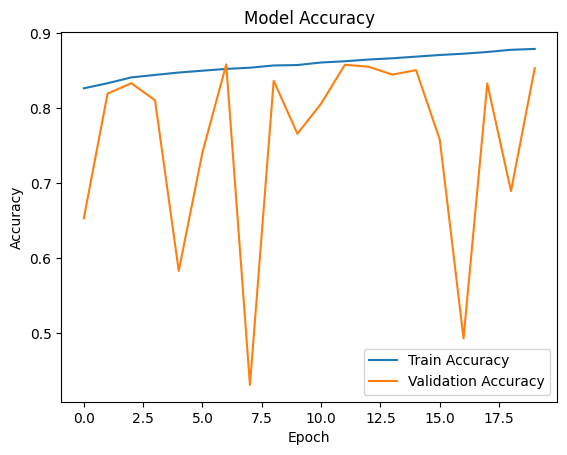

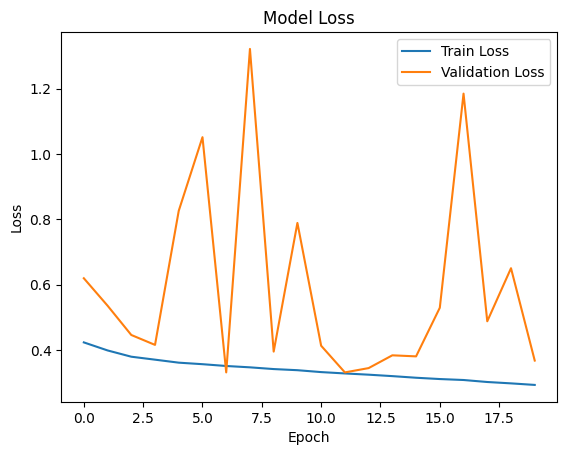

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Found 55505 validated image filenames belonging to 2 classes.
   5/1735 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8955 - loss: 0.2950 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.8524 - loss: 0.3703

✅ Test Accuracy: 0.8507
Test Loss: 0.3766


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step


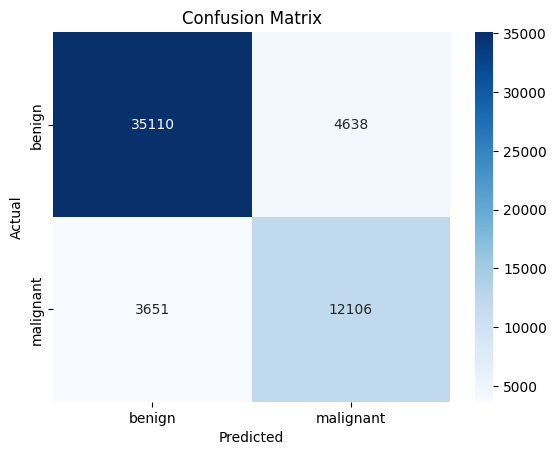

              precision    recall  f1-score   support

      benign       0.91      0.88      0.89     39748
   malignant       0.72      0.77      0.74     15757

    accuracy                           0.85     55505
   macro avg       0.81      0.83      0.82     55505
weighted avg       0.85      0.85      0.85     55505



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get true and predicted labels
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
model.save("breast_cancer_cnn_model.h5")